# Exploratory Data Analysis (Titanic Dataset)

Having already cleaned the data, the next step in the project is to perform exploratory data analysis on the dataset. While the primary focus is on the survival rate as the target variable, other insights and avenues will also be explored.


#### Content:
- Libaries & Dataset
- Univariate Analysis
- Bivariate Analysis
- Bivariate Analysis (other)
- Multivariate Analysis

## Libraries & Dataset

In [1]:
# Import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the cleaned dataset

df = pd.read_csv("titanic_cleaned.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyMembers
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


## Re-Cleaning Data

In [3]:
# Data types

df.dtypes

Survived           int64
Pclass             int64
Sex               object
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked          object
FamilyMembers      int64
dtype: object

In [4]:
# Re-cleaning data

df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [5]:
# Checking data types

df.dtypes

Survived            int64
Pclass           category
Sex              category
Age               float64
SibSp               int64
Parch               int64
Fare              float64
Embarked         category
FamilyMembers       int64
dtype: object

When saving as a CSV, pandas just writes raw data (values) - it does not save the data types or metadata.

## Univariate Analysis

### Categorical Data

First, the categorical variables will be examined through univariate analysis. These include **Survived, Pclass, Sex, and Embarked**. Each variable will be analysed using a countplot to visualise their distributions.

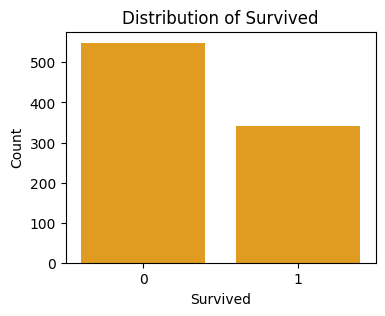

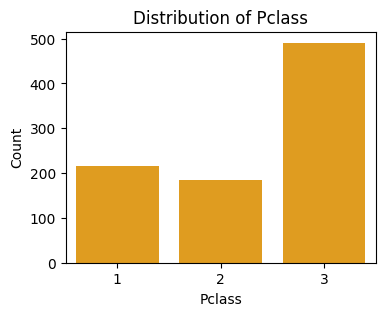

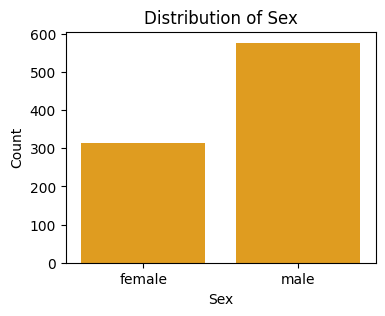

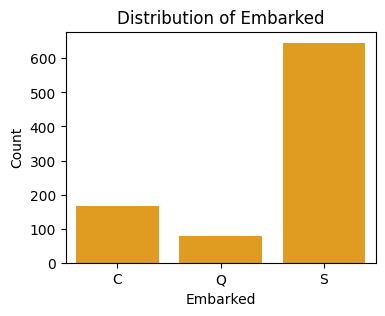

In [6]:
# Function for a value count of each plot

def plot_categorical(col):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df, x=col, color='orange')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()


# Plot each categorical variable

for cat in ['Survived', 'Pclass', 'Sex', 'Embarked']:
    plot_categorical(cat)

Findings from the categorical data:
+ There were more passengers who died than survived, indicating a clear imbalance that must be addressed in future modeling efforts.
+ The majority of passengers travelled in third class. When combined with the survival rate imbalance, this suggests that passenger class is an important factor to consider when analysing survival outcomes.
+ Male passengers outnumbered female passengers, which should be taken into account when examining the survival rate disparities.
+ Although the point of embarkation does not provide strong insights at this stage, it may reflect socioeconomic status, which could influence fare prices and potentially affect survival chances.

### Numerical Data

Next, the numerical variables will be analysed. These include **Age, Fare, SibSp, Parch, and FamilyMembers**. A univariate analysis will be conducted using histograms to explore the distribution of each variable.

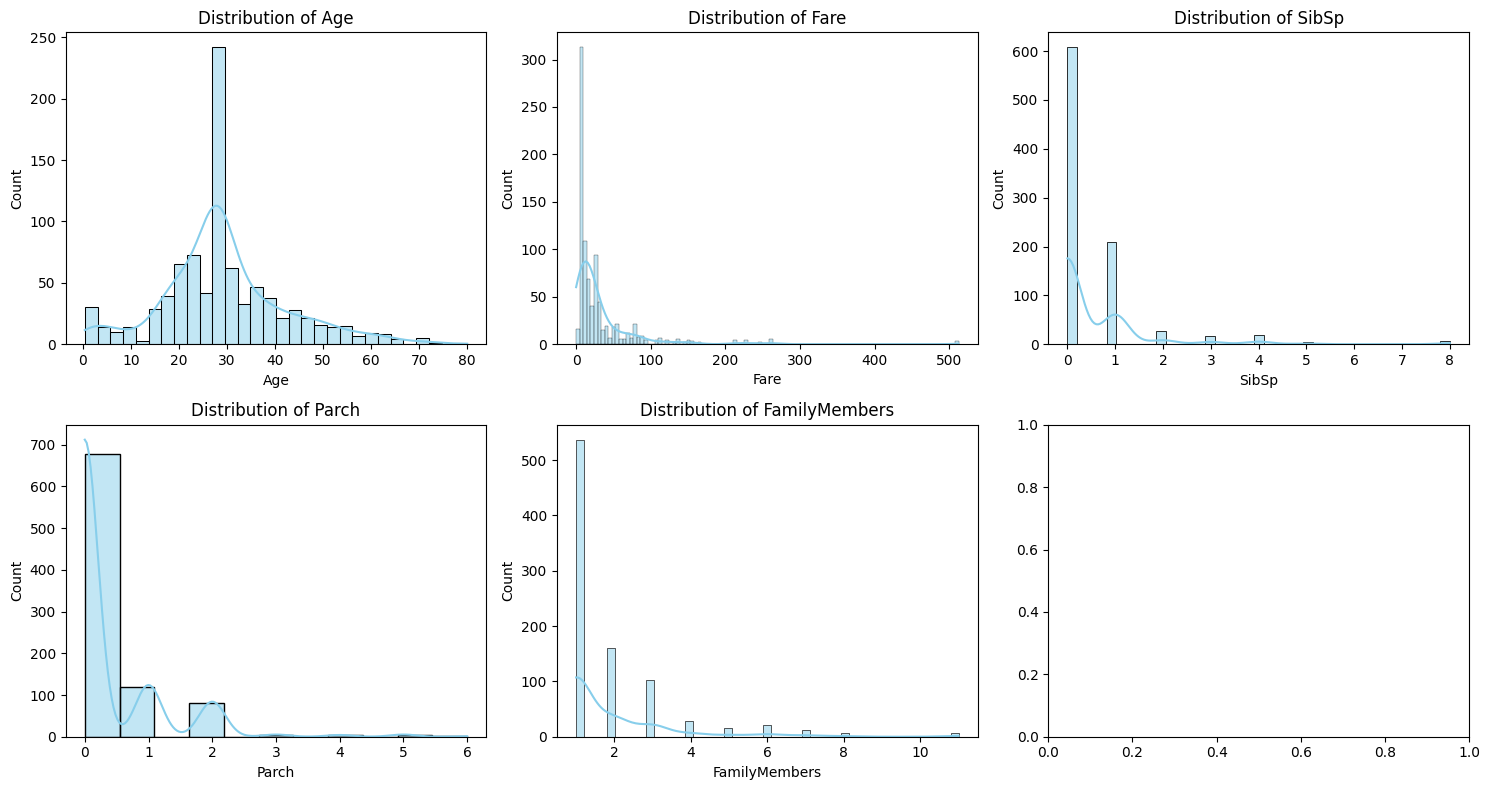

In [7]:
# List of numerical variables

numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilyMembers']


# Graph size & number of subplots grouped together

fig, axes = plt.subplots(2,3, figsize=(15, 8))
axes = axes.flatten()


# Plotting the value count for each numerical variable

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


Findings from the numerical data:
+ There is a noticeable spike in passenger ages around 30 years old. Considering the imbalance in survivors, it’s possible that young, fit adults may have sacrificed themselves to help others. Additionally, since missing ages were filled using the median age of approximately 29, this likely contributed to the spike. This should be taken into account during the modelling stage.
+ Aside from a few passengers who paid significantly higher fares, most paid around 10 units. This likely corresponds to passenger class and should be considered when analysing factors affecting survival.
+ The majority of passengers traveled without a sibling or spouse aboard.
+ Similarly, most passengers did not have children or parents traveling with them.
+ Most passengers travelled alone (family size of one). There is a gradual decline in frequency as group size increases as pairs, triplets, and so on. It would be interesting to explore whether travelling with others increased the chances of survival, as having companions might have provided mutual support during the disaster.

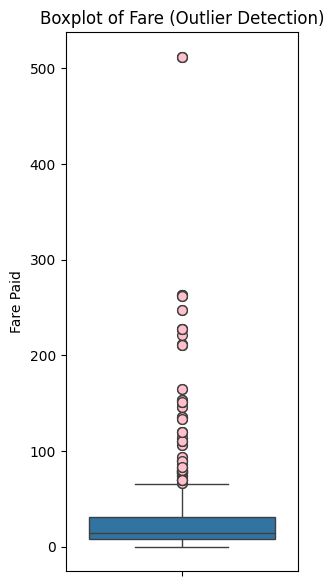

In [8]:
# Boxplot for finding outliers in Fare

plt.figure(figsize=(3, 7))
sns.boxplot(y=df['Fare'], flierprops=dict(markerfacecolor='pink',
                                           markersize=7))
plt.title("Boxplot of Fare (Outlier Detection)")
plt.ylabel("Fare Paid")

plt.show()

Most passengers paid similar fare prices; however, a small number of passengers paid substantially more. Notably, some paid over 500 units, which is a significant increase compared to the rest. This will be investigated further.

In [9]:
# Max Fare paid

max_fare = df['Fare'].max()
print("Maximum Fare:", max_fare)

Maximum Fare: 512.3292


In [10]:
# Count of those who paid the maximum Fare

max_fare_count = (df['Fare'] == max_fare).sum()
print("Number of passengers who paid the maximum Fare:", max_fare_count)

Number of passengers who paid the maximum Fare: 3


The highest fare paid was 512 units, with only three passengers paying this amount.

In [11]:
# Show dataset for those who paid maximum Fare

max_fare = np.where(df['Fare'] == max(df['Fare']))
df.loc[max_fare]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyMembers
258,1,1,female,35.0,0,0,512.3292,C,1
679,1,1,male,36.0,0,1,512.3292,C,2
737,1,1,male,35.0,0,0,512.3292,C,1


The data for each of the three highest-paying passengers is displayed. It is evident that the price paid may positively influence survival chances, as all three survived. Interestingly, all three embarked from 'C', which could indicate a higher socioeconomic status associated with that location. This relationship warrants further investigation in the bivariate analysis.

## Bivariate Analysis

In this section of the exploratory data analysis, the focus will be on the survival category as the target variable in relation to other features. First, the categorical variables will be examined. Next, the numerical variables will be analysed. Finally, combinations of variables that do not include the target variable will be explored.

### Catergorical Data

#### Sex vs Survived

In [12]:
# Sex vs Survived count

df.groupby(['Sex'], observed=True)['Survived'].value_counts().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


In [13]:
# Sex vs Survival rate

df.groupby('Sex', observed=True)['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

The first table clearly shows that being a female passenger significantly increased the chances of survival. The number of women who survived was more than double those who did not. This is further supported by the survival rates, with 74% of women surviving compared to only 18% of men.

Visualising this data is important to gain a clearer understanding.

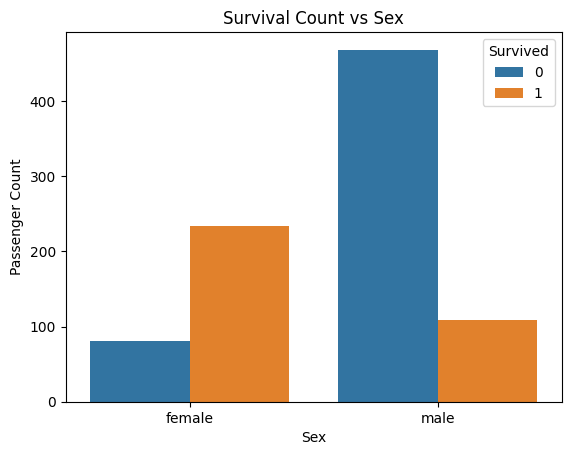

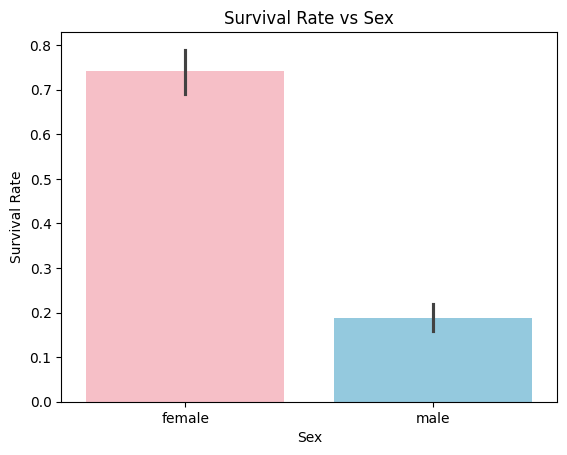

In [14]:
# Survival count by Sex

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count vs Sex")
plt.ylabel("Passenger Count")
plt.show()


# Survival rate by Sex

sns.barplot(x='Sex', y='Survived', hue='Sex', data=df, 
            palette={'male': 'skyblue', 'female': 'lightpink'})
plt.title("Survival Rate vs Sex")
plt.ylabel("Survival Rate")
plt.show()

These plots clearly illustrate that women had a significantly higher chance of survival, reflecting how they were prioritised during the evacuation of the Titanic.
+ A likely explanation for the survival disparity by sex is that societal norms and ethics in 1912 favoured women’s access to lifeboats.
+ Given this context, it is possible that men were expected to risk their own lives to help others survive.
+ The importance of sex as a key predictor of survival will be a significant factor in the next project, serving as an essential feature for machine learning models.

#### Pclass vs Survived

In [15]:
# Pclass vs Survived count

df.groupby(['Pclass'], observed=True)['Survived'].value_counts().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [16]:
# Pclass vs Survival rate

df.groupby('Pclass', observed=True)['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

First class was the only passenger class with more survivors than fatalities. The table showing survival rates by class clearly indicates that survival chances decrease as the passenger class lowers.

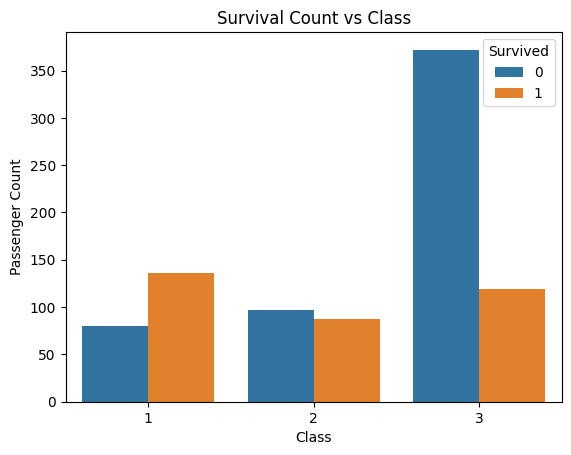

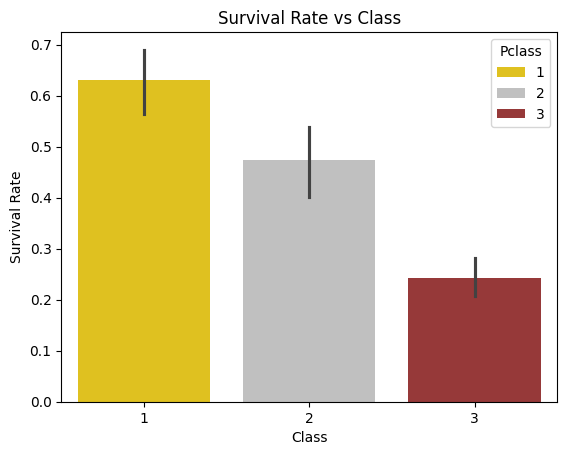

In [17]:
# Survival count by Pclass

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count vs Class")
plt.xlabel("Class")
plt.ylabel("Passenger Count")
plt.show()


# Survival rate by Pclass

sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=df, 
            palette={1: 'gold', 2: 'silver', 3: 'brown'})
plt.title("Survival Rate vs Class")
plt.xlabel("Class")
plt.ylabel("Survival Rate")
plt.show()

The two plots clearly demonstrate that the higher the passenger class, the greater the chance of survival, suggesting that individuals of higher socioeconomic status were prioritised.
+ It appears almost certain that those who paid more for their tickets - likely in higher classes and of a higher socioeconomic status - were given priority and better access to lifeboats.
+ First-class passengers may have been prioritised in line with social norms that favored the wealthy.
+ They may also have received information about the disaster earlier than others.
+ Additionally, higher-class cabins were likely located on upper decks, while third-class passengers may have faced physical barriers during evacuation.
+ This is clearly visualised in the countplot, where first class is the only category with more survivors than deaths, and the number of third-class deaths far exceeds that of any other group.
+ An alternative theory challenges the idea of class-based prioritisation: since the ship sank around 2 a.m., when most passengers were asleep, cabins might have been grouped by class, and the proximity of first-class cabins to lifeboat exits may have been coincidental rather than intentional. Regardless, the survival outcomes remain the same.

#### Embarked vs Survived

In [18]:
# Embarked vs Survived count

df.groupby(['Embarked'], observed=True)['Survived'].value_counts().unstack()

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


In [19]:
# Embarked vs Survival rate

df.groupby('Embarked', observed=True)['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

Cherbourg (C) is the only embarkation point where more passengers survived than died. This may indicate a correlation with passenger class, as those who boarded at Southampton (S) had a notably lower survival rate. Further analysis is needed to explore the relationship between embarkation point and passenger class.

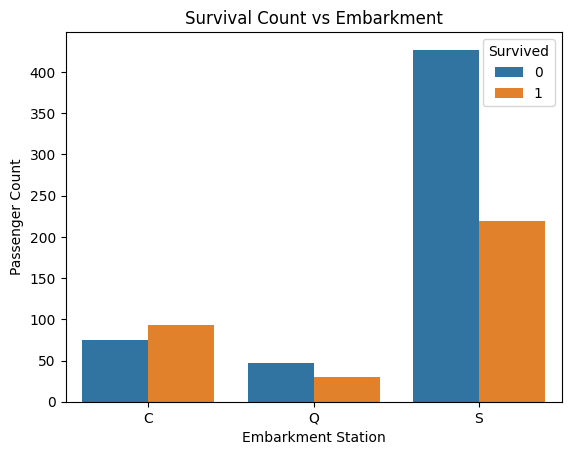

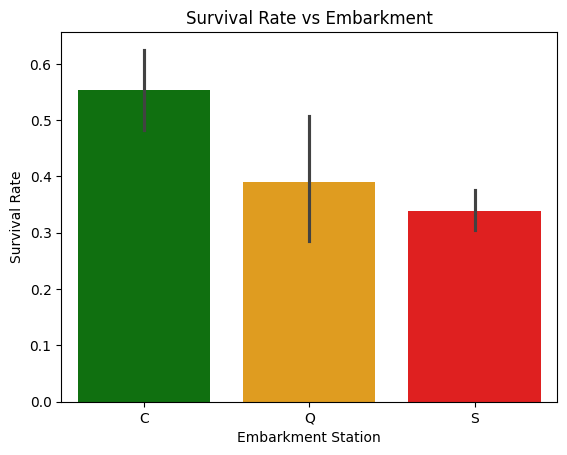

In [20]:
# Survival count by Embarkment

sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival Count vs Embarkment")
plt.xlabel("Embarkment Station")
plt.ylabel("Passenger Count")
plt.show()


# Survival rate by Embarkment

sns.barplot(x='Embarked', y='Survived', hue='Embarked', data=df, 
            palette={'S': 'red', 'C': 'green', 'Q': 'orange'})
plt.title("Survival Rate vs Embarkment")
plt.xlabel("Embarkment Station")
plt.ylabel("Survival Rate")
plt.show()

While this data alone isn't highly informative, the plots suggest a possible link to socioeconomic status. Further investigation into the relationship between embarkation point and passenger class is needed.
+ Southampton and Queenstown had similar survival rates, whereas Cherbourg showed a significantly higher survival rate.
+ The stark contrast between survival rates at Southampton and Cherbourg may reflect differences in socioeconomic status among passengers.
+ Due to the small sample size from Queenstown, it's difficult to draw firm conclusions, though the survival rate appears moderate.

### Numerical Data

#### Age vs Survived

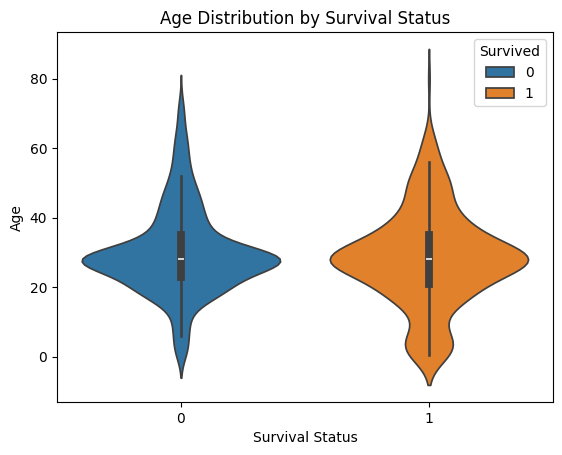

In [21]:
# Age vs Survived violinplot

sns.violinplot(x='Survived', y='Age', hue='Survived', data=df)
plt.title("Age Distribution by Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("Age")
plt.show()

This plot provides a useful introduction to how age influences survival chances:
+ It highlights that children aged 0–10 had a significantly higher likelihood of survival, as shown by the wider section of the violin plot within this age range for survivors.
+ The 20–40 age range is heavily represented among both survivors and non-survivors. However, this distribution is influenced by a bias introduced through median imputation when cleaning the data - missing age values were filled with the median age of 29.
+ This presents a limitation in the analysis, as using median imputation has artificially inflated the number of passengers recorded as being 29 years old, potentially skewing the results.

In [22]:
# Read original dataset

og_df = pd.read_csv("titanic.csv")


# Extract titles from the Name column

og_df['Title'] = og_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


# Show unique values of the new Title column

og_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [23]:
# Grouping titles

og_df['Title'] = og_df['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    
    'Countess': 'Royalty',
    'Lady': 'Royalty',
    'Sir': 'Royalty',
    'Jonkheer': 'Royalty',
    'Don': 'Royalty',

    'Dr': 'Proffess',
    'Rev': 'Proffess',
    'Major': 'Proffess',
    'Col': 'Proffess',
    'Capt': 'Proffess',
    
    # Unchanged
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master'
})


The above includes a range of titles commonly associated with men, women, and male children, as well as titles reflecting royalty and professions. These titles provide insight into gender demographics, marital status, and age groups. However, a limitation of this method is the lack of distinction for female children. For example, male children are clearly identified by the title 'Master', while females are grouped under 'Miss' - a broad title that reflects marital status rather than age, making it less specific for identifying young girls. Overall, this is still a more balanced imputation method.

In [24]:
# Filling non-values with the median value per title

og_df['Age'] = og_df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))


# Check for missing values

og_df['Age'].isnull().sum()

np.int64(0)

In this approach, missing age values are filled using the median age of each title group. For instance, if a passenger has the title 'Mr' and their age is missing, it will be replaced with the median age of all passengers who hold the title 'Mr'. This method helps provide more contextually accurate estimations based on social titles.

In [25]:
# Making a copy of the cleaned dataset

df2 = df.copy()


# Replacing the median-based imputation Age column with the title-based imputation Age column

df2['Age'] = og_df['Age']


# Save newly cleaned dataset

df2.to_csv("titanic_cleaned_age_imp.csv", index=False)

The cleaned dataset used in this project contained a bias due to the use of median age imputation. To address this, the Age column needed to be reprocessed to eliminate the bias. Initially, the plan was to modify the existing Age column directly. However, removing all entries with the median age of 29 would have also eliminated genuine values - 18 out of 891 entries were actual recorded ages of 29. Instead, the raw dataset was reloaded, and the original Age column was cleaned separately to avoid the bias introduced by median imputation. The newly cleaned Age column was then extracted and merged with the previously cleaned dataset replacing the biased Age column - resulting in a more accurate and unbiased representation of passenger ages.

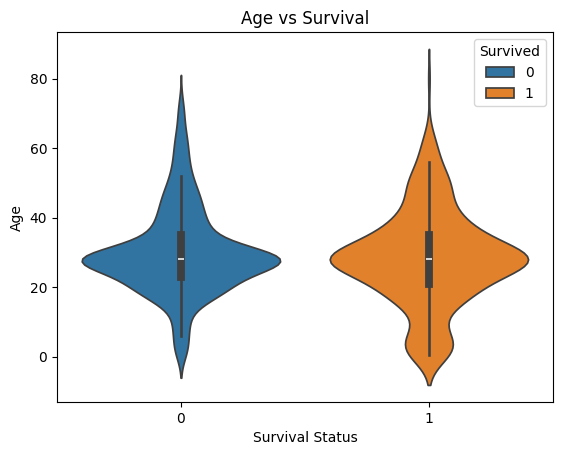

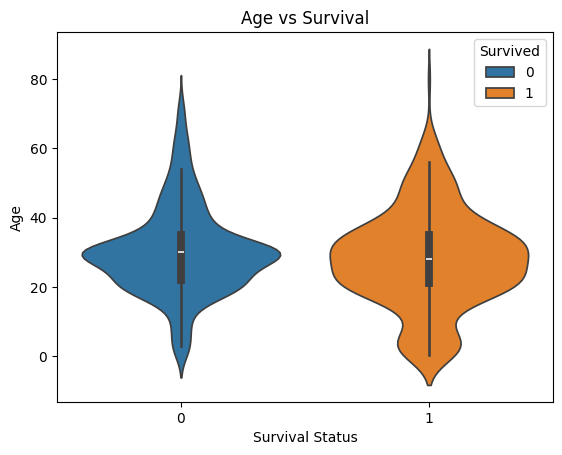

In [26]:
# Age vs Survived violinplot

sns.violinplot(x='Survived', y='Age', hue='Survived', data=df)
plt.title("Age vs Survival")
plt.xlabel("Survival Status")
plt.ylabel("Age")
plt.show()


# Age vs Survived violinplot (Updated Age column)

sns.violinplot(x='Survived', y='Age', hue='Survived', data=df2)
plt.title("Age vs Survival")
plt.xlabel("Survival Status")
plt.ylabel("Age")
plt.show()

Although both violin plots show similar overall trends, the updated version reveals noticeable differences, particularly the reduced bias toward age 29. The redistribution of age density across the plot demonstrates that re-cleaning the Age column was a beneficial and necessary step.

Key observations from the plots:
+ Higher survival rates among young children: Passengers aged 0–10 had a noticeably higher chance of survival, likely because children were prioritised during evacuation.
+ Non-survivors concentrated in young adulthood: The plot shows a wider distribution between ages 20–40 among those who did not survive, with a notable spike around age 30. This supports the earlier univariate analysis suggesting that younger adults, being physically fit and healthy, may have been expected to assist others rather than save themselves.
+ Slight increase in survival among the elderly: While not highly significant, there is a subtle increase in density among elderly survivors compared to non-survivors.
+ Dominance of the 20–40 age range: This age group is the most represented among both survivors and non-survivors, indicating that a large portion of passengers were in this range. However, the survivor group shows a more even spread across this category, while the non-survivors are densely concentrated around age 30.
+ Potential influence of other demographics: The differences in survival within the 20–40 age range may be influenced by factors such as class or gender. For example, a 30-year-old passenger of higher class or a female may have had a better chance of survival due to prioritisation, whereas a male in a lower class might have been expected to help others, reducing his own chance of survival.

These insights highlight the complex interplay between age, survival, and other demographic factors on the Titanic.

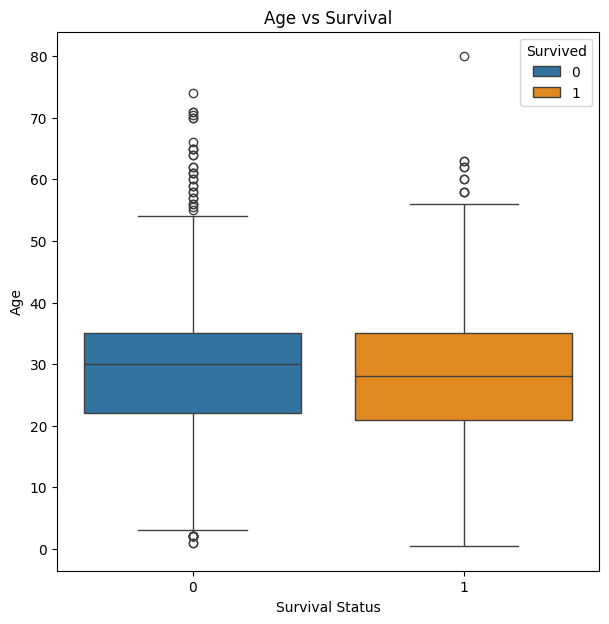

In [27]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Survived', y='Age', hue='Survived', data=df2, 
            palette={0: 'C0', 1: 'darkorange'})
plt.title('Age vs Survival')
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.show()

The boxplot reinforces several key findings observed in the earlier violin plot. One notable detail is the difference in medians: non-survivors have a median age of 30, while survivors have a slightly lower median of approximately 27. Additionally, the longer whiskers for the survivor group indicate a wider age distribution within the main data range, suggesting that survivors came from a broader range of age groups compared to non-survivors.

This further supports the idea that age is a valuable and insightful variable in understanding survival patterns. However, to fully interpret these findings, it’s important to explore how age interacts with other factors - such as gender and class - which may explain why age distributions differ so noticeably between survivors and non-survivors.

In [28]:
# Pivot table of survival chances for children and adults

age_bins = [0, 17, 100]
age_cat = pd.cut(df2['Age'], bins=age_bins)

df2.pivot_table('Survived', index=age_cat, observed=False)

,Survived
Age,
"(0, 17]",0.538462
"(17, 100]",0.360465


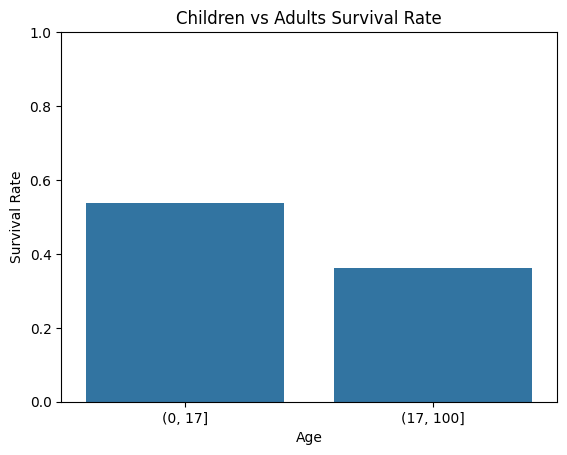

In [29]:
# Creating a variable of the pivot table

child_adult_age_survival = df2.pivot_table('Survived', index=age_cat, 
                                           observed=False)


# Children vs Adults Survival rate barplot

sns.barplot(x='Age', y='Survived', data=child_adult_age_survival)
plt.ylabel("Survival Rate")
plt.title("Children vs Adults Survival Rate")
plt.ylim(0, 1)
plt.show()

Throughout the analysis of the Age column, it has been consistently evident that children were given the highest priority during evacuation. This conclusion is further supported by the pivot table and corresponding bar plot, which show a clear difference in survival rates: 54% for children compared to 36% for adults.

Note: The use of pd.cut() ensures non-overlapping age bins. As a result, the first category includes passengers aged 0–17, while the second category covers ages 18–100.

#### Fare vs Survived

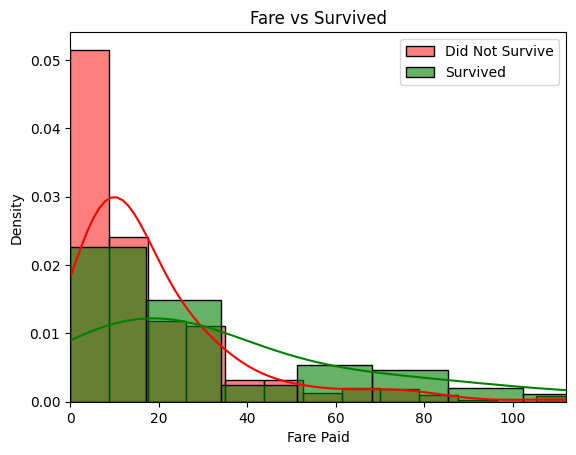

In [30]:
# Histogram for non-survivors

sns.histplot(df[df['Survived'] == 0]['Fare'], bins=30, color='red', 
             label="Did Not Survive", stat='density', kde=True)


# Histogram for survivors

sns.histplot(df[df['Survived'] == 1]['Fare'], bins=30, color='green', 
             label="Survived", stat='density', kde=True, alpha=0.6)


# Plotting histogram

plt.title("Fare vs Survived")
plt.xlabel("Fare Paid")
plt.ylabel("Density")
plt.xlim(0, df['Fare'].quantile(0.95))  # Remove outliers for a clearer outline of the price paid by the majority of passengers
plt.legend()
plt.show()

While there are some minor inconsistencies, the overall trend in this graph shows that survival rates tend to increase as ticket prices rise.
+ For the lowest fare range, between 0 and around 10 units, the number of deaths is more than double the number of survivors. This likely reflects that lower ticket prices correspond to third-class passengers, who are known to have the lowest survival rates. The relationship between Fare and Class will be explored further in the next stage of this analysis.
+ In the fare range of 10 to 18, the death rate remains slightly higher than the survival rate.
+ For the first time in the chart, within the fare range of 18 to 35, survivors outnumber non-survivors.
+ An exception to the trend occurs in the 35 to 50 fare range, where the death toll once again exceeds the number of survivors. This highlights the complexity of real-world data.
+ Several factors may explain this anomaly - for example, third-class passengers might have purchased more expensive family tickets. As we know, third-class passengers had the worst survival rates due to fewer advantages compared to higher-class passengers.
+ The fare bins in this range likely include a mix of second-class passengers and large groups of third-class passengers, contributing to the fluctuating results.
+ It’s also possible that the sample size in this range is too small, causing the results to be skewed by noise.
+ Beyond fares of 50 and above, the trend stabilises, with survival rates increasing as ticket prices rise.

This pattern outlines the complexities between fare price, passenger class, and survival outcomes.

#### FamilyMembers vs Survived

In [31]:
df['FamilyMembers'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

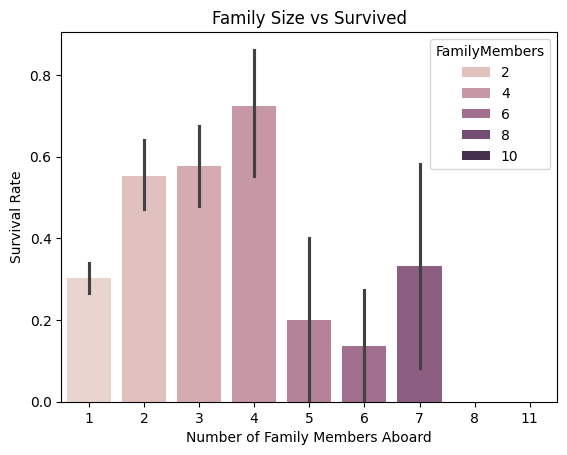

In [32]:
# Survival rate by Family Size

sns.barplot(x='FamilyMembers', y='Survived', hue='FamilyMembers', data=df)
plt.title("Family Size vs Survived")
plt.xlabel("Number of Family Members Aboard")
plt.ylabel("Survival Rate")
plt.show()

In this analysis, family size includes the individual themselves - so a family size of one means the person traveled alone, and a family size of two means they traveled with one other person.
+ The trend shows that survival rates increase with family size up to four members. The larger the family (up to this point), the higher the chance of survival.
+ One possible explanation is that passengers with partners or siblings could support and help each other during evacuation.
+ Additionally, families likely included children, who we know were given priority. As a result, parents or guardians may have also been prioritised and able to board lifeboats alongside their children.
+ However, there is a notable drop in survival rates for families of five or more members. It’s possible that larger families faced greater difficulty coordinating escape efforts, leading to some members being left behind.
+ A limitation of this analysis is the small sample size for larger families. The error bars on the plot widen as family size increases, especially for those with five or more members. These error bars represent the uncertainty or variability in estimating average survival rates.
+ This increased uncertainty is likely due to fewer passengers traveling in larger family groups, which reduces the reliability of conclusions drawn for these sizes.

## Bivariate Analysis (other)

In this section, a bivariate analysis will be conducted, similar to the previous one. However, the focus will now shift away from the target variable 'Survived' to uncover new insights from other variables.

Several hypotheses proposed earlier will be further examined and either confirmed or corrected:
+ Fare vs Pclass: It is assumed that higher ticket prices correlate with higher passenger classes. This will be tested by analysing fare distributions across different classes.
+ Embarkation Station 'C': The univariate analysis revealed that the three highest-paying passengers boarded at station 'C', which also had the highest survival rate. This section will investigate the relationship between embarkation point and class to explore the socioeconomic status associated with each boarding location.
+ Age Distribution Across Classes: Survivors spanned a wider age range, and first-class passengers had the highest survival rate. This raises the question: did first class also exhibit a broad age distribution, or was the wider age range among survivors primarily due to the prioritisation of children?
+ Gender Distribution by Class: Given that women were prioritised during evacuation, this analysis will also examine how gender was distributed across the different classes to understand if any class-based gender imbalances existed.

#### Fare vs Pclass

In [33]:
# Stats

df.groupby(['Pclass'], observed=True)['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


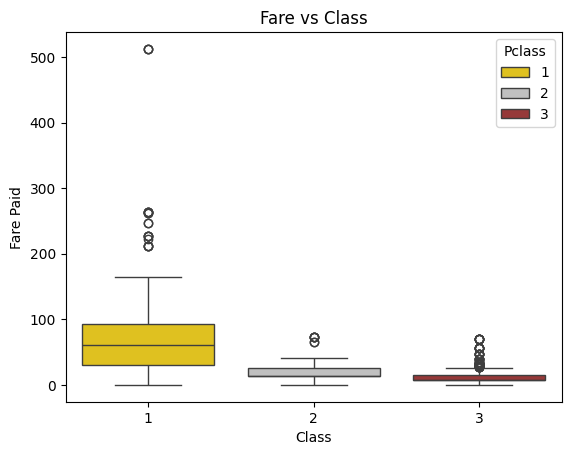

In [34]:
# Fare paid by Class

sns.boxplot(x='Pclass', y='Fare', hue='Pclass', data=df, 
            palette={1: 'gold', 2: 'silver', 3: 'brown'})
plt.title("Fare vs Class")
plt.xlabel("Class")
plt.ylabel("Fare Paid")
plt.show()

For all classes the lowest whisker is at zero units.

In [35]:
# Finding the lowest paying passengers

print(df['Fare'].value_counts().sort_index().head(10))

Fare
0.0000    15
4.0125     1
5.0000     1
6.2375     1
6.4375     1
6.4500     1
6.4958     2
6.7500     2
6.8583     1
6.9500     1
Name: count, dtype: int64


Fifteen passengers did not pay a fare to board the ship, as indicated by a minimum Fare value of zero across all classes. This suggests that each class may include at least one passenger with a fare of zero, potentially skewing the results. Whether this reflects a data entry issue or an actual circumstance (e.g. crew members or complimentary tickets), these entries will be excluded from the analysis to obtain a more accurate representation of fare distribution within each class.

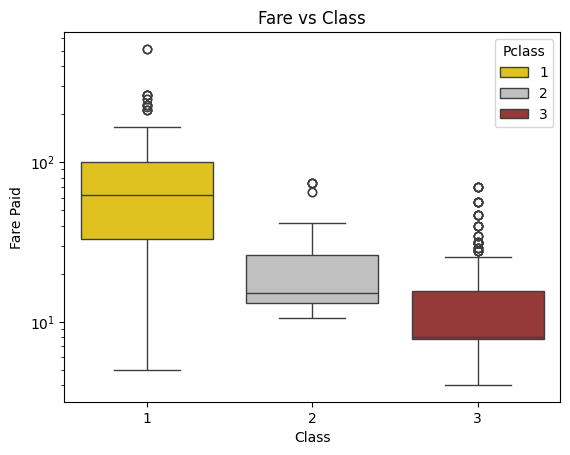

In [36]:
# Filtered data: Fare vs Class

fil_fare = df[df['Fare'] > 0.1] # Filtering out all 0 values


# Re-plotting

sns.boxplot(x='Pclass', y='Fare', hue='Pclass', data=fil_fare, 
            palette={1: 'gold', 2: 'silver', 3: 'brown'})
plt.title("Fare vs Class")
plt.xlabel("Class")
plt.ylabel("Fare Paid")
plt.yscale('log') # Making the distributions clearer with log scale
plt.show()

A logarithmic scale was applied to the Fare variable to clarify the distributions - compressing large values and expanding smaller ones.
+ As expected, fare prices generally increase with passenger class, showing a positive relationship between Fare and Pclass.
+ There is notable overlap between the higher fares in third class and the lower fares in second class. This supports the earlier observation in the Fare vs Survived plot, where survival trends reversed midway. One explanation is that some third-class passengers may have purchased group or family tickets at higher prices, creating inconsistencies between fare paid and survival outcomes.
+ First class exhibits the widest fare range, suggesting a variety of ticket types or service levels within the class. Its median fare is also significantly higher than those of the other two classes, reinforcing the strong correlation between higher fare and class.
+ In both second and third class, the median fare lies at the lower end of the range, indicating that the majority of passengers in these classes paid minimal fees.
+ Each class contains outliers - passengers who paid significantly more than their peers - highlighting fare variability even within classes.
+ Interestingly, the lowest fare recorded in first class is lower than that of second class. This may suggest that individuals with higher social standing had access to discounted or privileged ticketing options.

Evidentally, Fare and Class act as a proxy for wealth and status, ultimately relating back to survival chances.

#### Embarked vs Class

In [37]:
df.groupby(['Embarked'], observed=True)['Pclass'].value_counts().unstack()

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,129,164,353


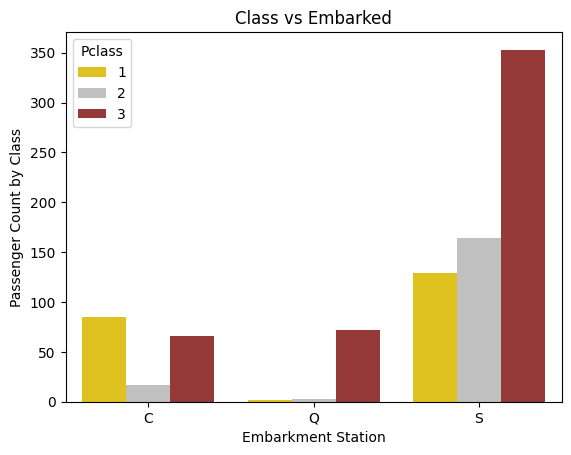

In [38]:
# Pclass count by Embarked

sns.countplot(x='Embarked', hue='Pclass', data=df, 
              palette={1: 'gold', 2: 'silver', 3: 'brown'})
plt.title("Class vs Embarked")
plt.xlabel("Embarkment Station")
plt.ylabel("Passenger Count by Class")
plt.show()

Analysing embarkation points through the lens of Titanic passenger class offers insights into the socioeconomic background of both the passengers and the regions surrounding each port.
+ Southampton (S): The most common embarkation point, with the majority of passengers in third class. First-class passengers were the least represented here, though all three classes were present. The diverse class distribution suggests Southampton was a socioeconomically mixed region.
+ Cherbourg (C): The second most common port, and notably, the only one where first-class passengers outnumbered those in other classes. This indicates that Cherbourg attracted a wealthier group of passengers, likely reflecting a more affluent region.
+ Queenstown (Q): Predominantly third-class passengers boarded here, suggesting the area had a lower-income population. However, Queenstown had the fewest overall passengers, so the limited sample size reduces the strength of this conclusion.

Overall, the data suggests that each port attracted passengers of different economic backgrounds. These socioeconomic patterns, in turn, influenced class distribution and indirectly affected survival probabilities, as class was a significant factor in survival outcomes.

#### Age vs Class

In [39]:
# Summary of Age vs Class

df2.groupby('Pclass', observed=True)['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,37.326019,14.015781,0.92,29.0,35.0,48.0,80.0
2,184.0,29.787120,13.605174,0.67,23.0,30.0,36.0,70.0
3,491.0,25.757475,11.113889,0.42,20.0,27.0,30.0,74.0


In [40]:
# Average age of all passengers

df2['Age'].mean()

np.float64(29.394130190796854)

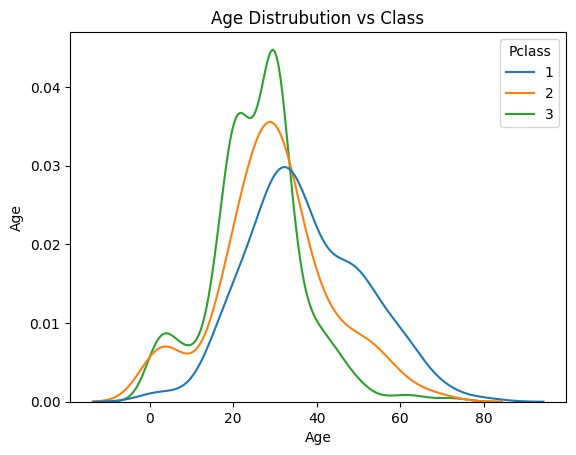

In [41]:
# Age by Class

sns.kdeplot(data=df2, x='Age', hue='Pclass', common_norm=False)
plt.title("Age Distrubution vs Class")
plt.ylabel("Age")
plt.show()

The data shows a clear trend: as passenger class increases, so does the average age.
+ First Class: Passengers in this class had the highest average age, around 29 years. The age distribution shows a higher density of middle-aged individuals and very few young children. The KDE curve for this group only begins to rise in the late teens, indicating that most young children were not traveling in this class.
+ Third Class: This group had the lowest average age and the highest density of young children and infants. The presence of more families likely contributed to this trend, as third-class tickets were more affordable for larger groups.
+ Second Class: This class sits in between, both in terms of average age and age distribution. It represents a mix of age groups and closely aligns with the overall average age of all passengers.

A simple explanation for this pattern could be financial: older passengers may have been more established in their careers and thus more able to afford the higher ticket prices of first class. Meanwhile, younger families with children were more commonly found in third class, likely due to the lower cost of travel.

#### Sex vs Class

In [42]:
# Count

df.groupby(['Pclass'], observed=True)['Sex'].value_counts().unstack()

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [43]:
# Percentages

pd.crosstab(df['Pclass'], df['Sex'], normalize='index') * 100

Sex,female,male
Pclass,,
1,43.518519,56.481481
2,41.304348,58.695652
3,29.327902,70.672098


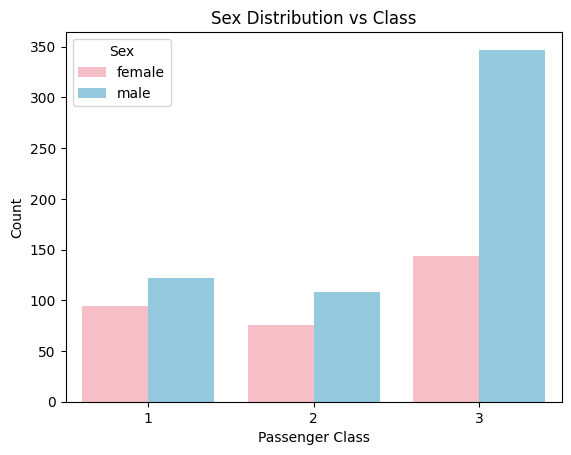

In [44]:
# Sex Distribution by Class

sns.countplot(x='Pclass', hue='Sex', data=df, 
              palette={'male': 'skyblue', 'female': 'lightpink'})
plt.title("Sex Distribution vs Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()


Across all classes, the male population was larger than the female population. However, the gender balance varied by class:
+ First Class: This was the most balanced in terms of gender. The relatively even distribution may reflect wealthier couples traveling together for leisure or business, indicating the affordability of such trips for both men and women in higher social classes.
+ Second Class: While not as balanced as first class, the gender ratio was still more even compared to third class. This suggests a mix of family units and individuals traveling for various reasons, possibly including work, study, or relocation.
+ Third Class: This class had the highest number of passengers overall, with men significantly outnumbering women. This could reflect patterns of male-dominated migration in the early 20th century, with many men traveling alone in search of work abroad. Women were still well-represented, likely accompanying partners and children as part of emigrating families.

The gender distribution also reflects the social and economic dynamics of the time - men often traveled alone for employment opportunities, families emigrated together seeking better lives, and affluent couples had the means to travel more comfortably.

## Multivariate Analysis

The purpose of this analysis is to uncover deeper insights that cannot be identified through univariate or bivariate analysis alone, by examining interactions between three or more variables.
+ While it is known that women and first-class passengers were prioritised during evacuation, how did survival rates for women vary across different passenger classes?
+ Similarly, children were given priority - but did children from higher classes have a greater chance of survival compared to those in lower classes?
+ It is also important to explore how each variable interacts with others in relation to the target variable, Survived, to better understand the underlying patterns.
+ Finally, a multivariate logistic regression model will be developed to quantify how multiple variables jointly influence survival outcomes.

### vs Survived

#### Women & Class vs Survival

In [45]:
# Percentages

df.groupby(['Pclass', 'Sex'], observed=True)['Survived'].value_counts(normalize=True).unstack() * 100

Survived               0          1
Pclass Sex                         
1      female   3.191489  96.808511
       male    63.114754  36.885246
2      female   7.894737  92.105263
       male    84.259259  15.740741
3      female  50.000000  50.000000
       male    86.455331  13.544669

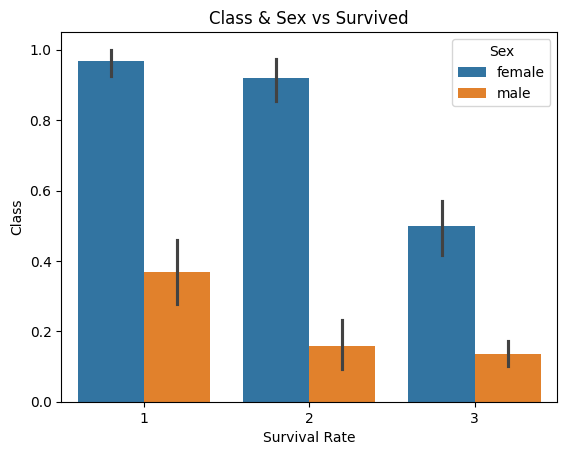

In [46]:
# Plotting Sex & Class by Survival

sns.barplot(x='Pclass', y='Survived', hue='Sex', data= df)
plt.title("Class & Sex vs Survived")
plt.ylabel("Class")
plt.xlabel("Survival Rate")
plt.show()

Women had a significantly higher survival rate across all passenger classes.
+ First Class: Nearly all women survived, with a survival rate of 97%.
+ Second Class: The survival rate remained high at 92%, though slightly lower than first class.
+ Third Class: Survival dropped considerably, with exactly 50% of the women surviving.

Even among women, survival chances reflected a class-based disparity — the higher the class, the greater the likelihood of survival.

In contrast, male survival rates were much lower across all classes compared to their female counterparts. However, they followed a similar trend: men in higher classes had a better chance of survival than those in lower classes.

#### Children & Class vs Survival

In [47]:
# Variable for children

children = df2[df2['Age'] <= 17]

In [48]:
# Percentages (for children)

pd.crosstab(children['Pclass'], children['Survived'], normalize='index') * 100

Survived,0,1
Pclass,,
1,8.333333,91.666667
2,8.695652,91.304348
3,62.195122,37.804878


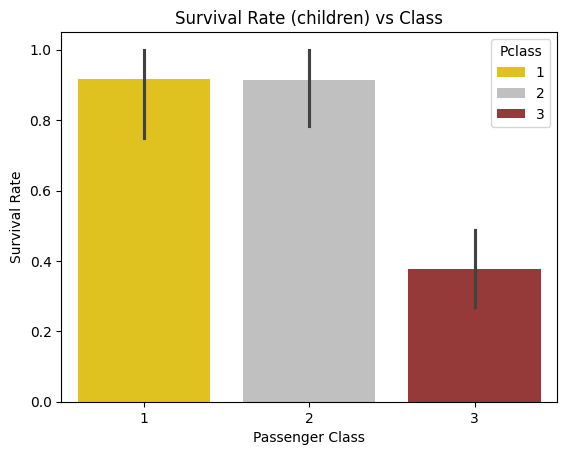

In [49]:
# Plotting Children & Class vs Survival Rate

sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=children, 
            palette={1: 'gold', 2: 'silver', 3: 'brown'})
plt.title("Survival Rate (children) vs Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

There is a slight deviation from the overall trend in this part of the analysis:
+ Children in both first and second class had nearly identical survival rates - 91.6% for first class and 91.3% for second class.
+ In both these classes, the number of child survivors was significantly higher than the number of child fatalities.
+ However, children in third class faced a much lower survival rate of only 37%.

Interestingly, while the third class passengers consistently received lower survival chances throughout the research, first and second class children were treated equally in terms of survival priority - a distinction not observed elsewhere in the study.

### Variable Relationships

#### Pair Plot (Numerical)

In [50]:
# Checking data types

df2.dtypes

Survived            int64
Pclass           category
Sex              category
Age               float64
SibSp               int64
Parch               int64
Fare              float64
Embarked         category
FamilyMembers       int64
dtype: object

In [51]:
# Copying dataset

df_num_plot = df2.copy()


# Encode 'Sex' as numeric (female: 0, male: 1)

df_num_plot['Sex'] = df_num_plot['Sex'].map({'female': 0, 'male': 1})


# Turn 'Pclass' to an integer

df_num_plot['Pclass'] = df_num_plot['Pclass'].astype(int)


Pair plots are primarily designed for continuous numerical variables and do not handle categorical variables effectively. To address this, a copy of the original dataset was created to preserve the original data. In this copy, the 'Sex' column was numerically encoded, and 'Pclass' was converted to an integer type. These transformations allow all selected columns to be visualised together, making it easier to explore the relationships between them.

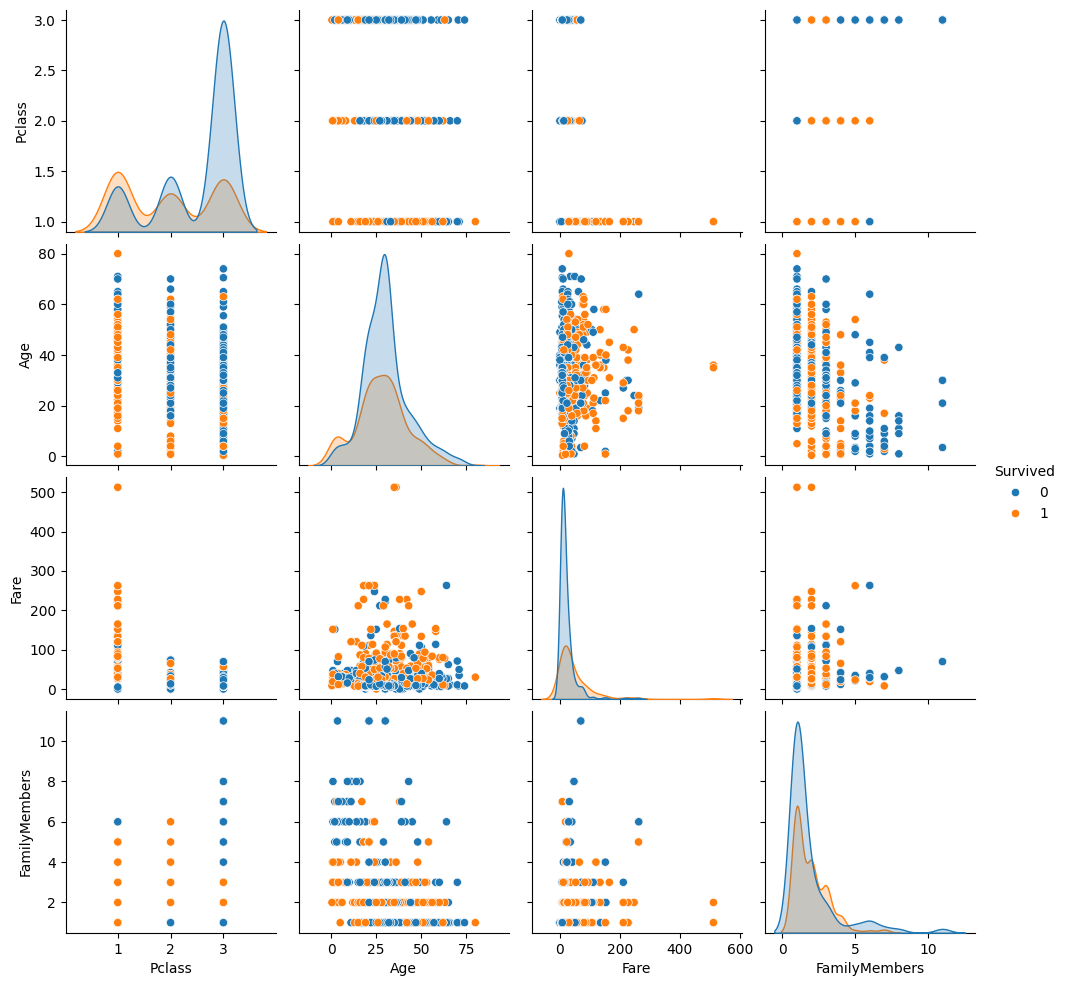

In [52]:
# Plotting variable relationships

sns.pairplot(df_num_plot[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 
                          'FamilyMembers']], hue='Survived')
plt.show()

A pairplot was generated to explore pairwise relationships between numerical features in the dataset (Age, Fare, Pclass, Sex (encoded), and FamilyMembers), with the target variable Survived as the hue.

While the plot provided a useful overall view of feature distributions and potential interactions, it did not reveal any new or unexpected patterns beyond what was already observed during the earlier stages of analysis (e.g. univariate and bivariate visualisations).

This outcome reinforces the earlier findings - such as the association between higher fares and survival, or the relationship between higher passenger class and increased fares - confirming the consistency of observed trends.

The pairplot primarily served as a visual validation of earlier insights rather than uncovering new relationships. It also highlighted the limited value of including categorical variables (like Sex and Pclass) in this type of plot without further transformation or specialised visualisations.

#### Correlation Heatmap (Numerical)

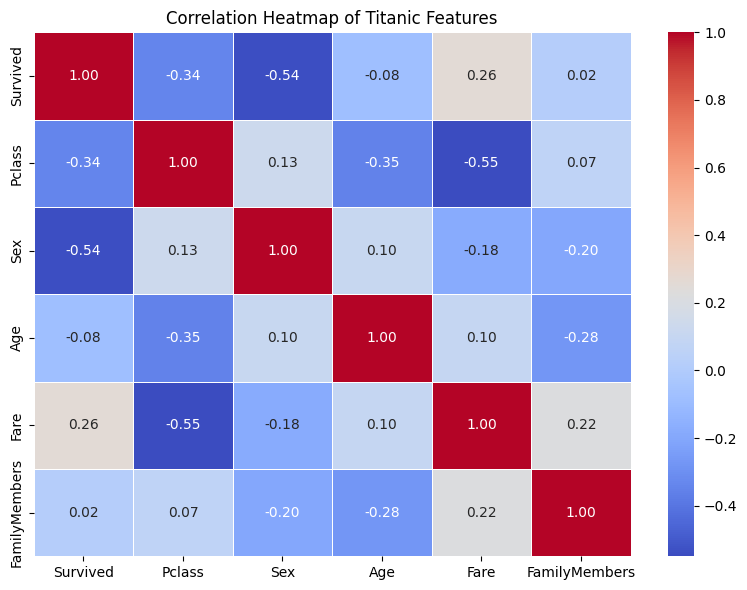

In [53]:
# Variable of features

corr_features = df_num_plot[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilyMembers']]


# Correlation matrix variable

corr_matrix = corr_features.corr()


# Plotting

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Features")
plt.tight_layout()
plt.show()

Summary of Correlation Heatmap: Titanic Features

Survived:
+ Negatively correlated with Sex (female=0, male=1), indicating females had higher survival rates.
+ Positively correlated (weak to moderate) with Fare, suggesting passengers who paid higher fares were more likely to survive.
+ Negatively correlated (weak) with Pclass (higher number = lower class), meaning passengers in higher classes (1st class) had better survival chances.
+ Slight negative correlation with Age, indicating younger passengers were slightly more likely to survive. However, children are a small proportion of the overall passengers, so their influence on the correlation is limited, making it a weak/slight correlation overall.
+ Small positive correlation with FamilyMembers, suggesting travelling with family might have slightly improved survival odds.

Pclass:
+ Negatively correlated with Fare, reflecting that lower classes paid lower fares.
+ Slight negative correlation with Age, indicating older passengers were more often in higher classes.
+ Small negative correlation with survival, showing higher class passengers survived more.

Sex:
+ Moderate positive correlation with survival (females survived more).
+ Low correlation with other features.

Age:
+ Weak negative correlation with survival (younger passengers had somewhat better survival odds).
+ Weak negative correlation with Pclass.

Fare:
+ Moderately negatively correlated with Pclass (higher fare for lower number meaning higher class).
+ Weak positive correlation with survival.

FamilyMembers:
+ Weak positive correlation with survival, indicating a slight increase in the chance of survival for passengers who were not travelling alone.

## Overall Findings

### Key Insights

Demographics:
+ Gender was one of the most influential factors: female passengers had significantly higher survival rates than males, reflecting evacuation protocols that prioritised women.
+ Age also played a role, with children (especially under 10) more likely to survive than adults. However, survival dropped off for passengers over age 60.

Socioeconomic Status:
+ First-class passengers had a significantly higher likelihood of survival compared to those in second and third class.
+ Passenger class had a clear relationship with survival: those in first class had the highest survival rates, followed by second class, with third class having the lowest.
+ Passengers who embarked at Cherbourg (C) had a higher likelihood of survival. This is likely related to Cherbourg having a higher proportion of first class passengers.

Family Connections:
+ Passengers travelling with small families (two to four members) were more likely to survive, suggesting that moderate family size positively correlated with survival chances.
+ Large families (5+), however, showed lower survival rates, possibly due to logistical challenges during evacuation.

### Patterns & Interactions

Demographics:
+ Women in first and second class had a significantly higher chance of survival, while men in second and third class had notably lower survival rates.
+ Children in first and second class also showed a high likelihood of survival.
+ Although survival differed sharply between first and third class overall, the gap between first and second class was minimal for women and children. This suggests that while class influenced survival, demographic factors like age and sex had a more substantial impact.

Socioeconomic Status:
+ Apart from the "Fare" variable, no major outliers were observed.
+ Significant variability in fares was observed within each passenger class, indicating that ticket price alone was less predictive of survival compared to class when considered independently.

Proxy Variables:
Some features in the dataset contain overlapping information and can act as proxies for one another:
+ Fare and Pclass are strongly correlated, as first-class passengers typically paid higher fares.
+ Embarked is partially associated with both Pclass and Fare - for instance, the port of Cherbourg had a higher proportion of first-class passengers.

### Limitations & Considerations

Missing Data:
+ Age: Initially, missing age values were filled using the overall median, but this introduced bias. To address this, a more nuanced approach was taken by imputing the median age based on passenger titles. This method provided more balanced estimates across groups such as men, women, male children, royalty, and professionals - though it lacked a distinct category for female children. Overall, this title-based imputation was more representative than using a single median value.
+ Cabin: A large portion of the Cabin data was missing (687 entries), making accurate imputation challenging. Although insights could potentially be drawn from the first letter of the cabin code (which often indicates deck level), the remaining data was too sparse to support reliable conclusions.

### Implications for Modelling

Based on the exploratory data analysis, several variables emerge as strong candidates for predictive modeling, while others may need transformation or careful consideration due to overlap.

Promising Features:
+ Sex: One of the most powerful predictors - female passengers had significantly higher survival rates.
+ Pclass: Strongly linked to survival, with first-class passengers showing the highest likelihood of survival.
+ Age: Demonstrates a non-linear relationship with survival; children had higher survival rates, whereas older adults had lower chances.
+ Embarked: Shows a moderate association with survival, particularly passengers from Cherbourg. However, since this variable overlaps with both Fare and Pclass, it will be tested for its independent predictive value during modelling to avoid redundancy.


Feature Engineering:
+ FamilyMembers (SibSp + Parch + 1): Created during the data cleaning and preprocessing stage, this feature captures the total number of family members aboard, including the passenger. It provides a clearer representation of the influence of family presence on survival, as medium-sized families tended to have better outcomes. 
+ The original SibSp and Parch columns will be removed to avoid redundancy and potential multicollinearity.


Categorical Encoding Plans:

While some machine learning algorithms can handle categorical data directly, most perform better when these variables are converted into numerical formats.
+ Sex: Will be encoded as a binary variable (e.g. 0 = male, 1 = female), as it is a straightforward binary category.
+ Pclass: Can be treated as an ordinal feature due to its inherent ranking (1st > 2nd > 3rd), but one-hot encoding may be applied if modelling reveals non-linear or complex interactions.
+ Embarked: Will be one-hot encoded, as it is a nominal variable with no natural ordering among its categories.


Dropped Variables:

These variables were removed during the cleaning and preprocessing stage and will remain excluded during modeling.
+ Cabin: Contains a high proportion of missing values, making it unreliable for analysis.
+ Ticket: Lacks consistent patterns or predictive value.
+ Name: Specific to individual passengers and not useful for generalisation.
+ PassengerId: Serves only as a unique identifier and offers no predictive insight.

To be removed.
+ As previously noted, the SibSp and Parch columns will be excluded to eliminate redundancy and reduce the risk of multicollinearity.